<h3 style='color:green' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset/data

In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import json
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

%matplotlib inline

In [86]:
df = pd.read_csv("dataset/dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [88]:
df.dtypes

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

In [89]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': ***{len(unique_values)}***{(unique_values)}\n")

Unique values in 'Disease': ***41***['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']

Unique values in 'Symptom_1': ***34***['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakne

In [90]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4915     True
4916     True
4917     True
4918     True
4919     True
Length: 4920, dtype: bool

as many symptoms are common in different column we have to make a unique list for each row

In [91]:
df.isnull().any()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4      True
Symptom_5      True
Symptom_6      True
Symptom_7      True
Symptom_8      True
Symptom_9      True
Symptom_10     True
Symptom_11     True
Symptom_12     True
Symptom_13     True
Symptom_14     True
Symptom_15     True
Symptom_16     True
Symptom_17     True
dtype: bool

### Stripping spaces and filling null values

In [92]:
#df = df.applymap(lambda x: x.replace('_', ' ') if isinstance(x, str) else x)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [93]:
df = df.fillna(0)
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


In [94]:
df.dtypes

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

In [95]:
df.isnull().any().any()

False

In [96]:
df["Disease"].unique()


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

### Total no. of available symptoms

In [97]:
# Extract unique words across all columns except 'disease'
unique_words = set(df.drop(columns='Disease').values.flatten())
unique_words.remove(0)
unique_words

{'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic _patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sug

In [98]:
len(unique_words)

131

### Create new columns

In [99]:
# Create new columns for each unique word and fill with 0 or 1
for word in unique_words:
    if word != "":  # Skip empty strings if any
        df[word] = df.drop(columns='Disease').apply(lambda row: 1 if word in row.values else 0, axis=1)

df

C:\Users\ankit\AppData\Local\Temp\ipykernel_30420\2784687506.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[word] = df.drop(columns='Disease').apply(lambda row: 1 if word in row.values else 0, axis=1)
C:\Users\ankit\AppData\Local\Temp\ipykernel_30420\2784687506.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[word] = df.drop(columns='Disease').apply(lambda row: 1 if word in row.values else 0, axis=1)
C:\Users\ankit\AppData\Local\Temp\ipykernel_30420\2784687506.py:4: PerformanceWarning: DataFrame is highly fragmente

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,anxiety,runny_nose,brittle_nails,spotting_ urination,irritation_in_anus,blood_in_sputum,mucoid_sputum,abnormal_menstruation,yellowish_skin,loss_of_appetite
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Dropping initial symptom columns (columns '1' to '17')
for col in df.columns:                   #columns_to_drop = [col for col in df.columns if col not in unique_words]
    if col not in unique_words and col != 'Disease':
         df = df.drop(col, axis=1)
df

,Disease,mild_fever,swelling_of_stomach,chills,patches_in_throat,stomach_pain,abdominal_pain,receiving_blood_transfusion,blister,swelled_lymph_nodes,...,anxiety,runny_nose,brittle_nails,spotting_ urination,irritation_in_anus,blood_in_sputum,mucoid_sputum,abnormal_menstruation,yellowish_skin,loss_of_appetite
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df.sample(5)

,Disease,mild_fever,swelling_of_stomach,chills,patches_in_throat,stomach_pain,abdominal_pain,receiving_blood_transfusion,blister,swelled_lymph_nodes,...,anxiety,runny_nose,brittle_nails,spotting_ urination,irritation_in_anus,blood_in_sputum,mucoid_sputum,abnormal_menstruation,yellowish_skin,loss_of_appetite
164,Chicken pox,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4432,Drug Reaction,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2988,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2464,Drug Reaction,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4718,Chronic cholestasis,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [102]:
# df1 = pd.read_csv("Symptom-severity.csv")
# df1.head()

### LabelEncoding disease

In [103]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Disease"] = le.fit_transform(df["Disease"])

df

,Disease,mild_fever,swelling_of_stomach,chills,patches_in_throat,stomach_pain,abdominal_pain,receiving_blood_transfusion,blister,swelled_lymph_nodes,...,anxiety,runny_nose,brittle_nails,spotting_ urination,irritation_in_anus,blood_in_sputum,mucoid_sputum,abnormal_menstruation,yellowish_skin,loss_of_appetite
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
diseases_classes=le.classes_
diseases_classes

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [105]:
len(diseases_classes)

41

In [106]:
diseases_classes[15]

'Fungal infection'

### Splitting training - testing

In [107]:
x=df.drop('Disease', axis=1)
y= df['Disease']

In [108]:
x

,mild_fever,swelling_of_stomach,chills,patches_in_throat,stomach_pain,abdominal_pain,receiving_blood_transfusion,blister,swelled_lymph_nodes,history_of_alcohol_consumption,...,anxiety,runny_nose,brittle_nails,spotting_ urination,irritation_in_anus,blood_in_sputum,mucoid_sputum,abnormal_menstruation,yellowish_skin,loss_of_appetite
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
symptoms=x.columns
len(symptoms)

131

In [110]:
x = x.to_numpy()
y = y.to_numpy()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
y

array([15, 15, 15, ..., 38, 35, 27])

In [112]:
#from sklearn.model_selection import train_test_split
#stratified y
x_train, x_test, y_train, y_test=  train_test_split(x,y, test_size=0.1, random_state=1,stratify=y)      #  '''stratified''' splitting  train and test (more accurate)

### One hot encoding for disease_classes

In [113]:
#from tensorflow import keras

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=41, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=41, dtype='float32'
)

y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [114]:
len(diseases_classes)

41

## ANN

In [118]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(100, input_shape=( len(symptoms),   ),   activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(len(diseases_classes)   , activation='softmax')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train_categorical, epochs=50)

Epoch 1/50
139/139 [==============================] - 1s 3ms/step - loss: 1.9668 - accuracy: 0.7821
Epoch 2/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 1.0000
Epoch 3/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 4/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 5/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 6/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/50
139/139 [==============================] - 0s 3ms/step - loss: 9.1754e-04 - accuracy: 1.

#### Evaluation

In [119]:
model.evaluate(x_test, y_test_categorical)


16/16 [==============================] - 0s 3ms/step - loss: 9.8123e-06 - accuracy: 1.0000


[9.812343705561943e-06, 1.0]

In [120]:
yp = model.predict(x_test)
yp[:5]

16/16 [==============================] - 0s 2ms/step


array([[5.66954981e-15, 1.09619043e-08, 6.68565079e-08, 1.03702803e-10,
        1.28933451e-07, 3.72629705e-11, 1.23941898e-10, 6.38920694e-09,
        1.14286024e-07, 1.04593600e-16, 9.99998510e-01, 1.67673395e-08,
        4.49555020e-12, 5.49199900e-13, 2.56191092e-13, 9.69680958e-09,
        3.31771394e-12, 1.10341965e-07, 1.19377874e-09, 6.13250284e-11,
        1.66453653e-15, 1.41760642e-17, 4.50804194e-09, 8.94438834e-09,
        1.49136970e-11, 1.84623020e-12, 3.75921126e-12, 7.60533303e-10,
        1.87181976e-12, 9.04023523e-08, 1.65517825e-11, 1.19723259e-10,
        4.85023523e-12, 2.08386441e-09, 3.26444251e-07, 1.20028809e-09,
        3.87304425e-07, 1.02475234e-07, 6.51964012e-15, 2.33898372e-19,
        5.63924992e-13],
       [1.09693419e-08, 6.10523909e-10, 2.68291046e-07, 1.57350868e-11,
        1.21269750e-09, 3.04092002e-10, 1.01190301e-08, 5.90336924e-07,
        1.37370318e-06, 3.11446342e-07, 1.91836813e-09, 4.41760228e-08,
        3.51298752e-07, 4.46587478e-08,

In [121]:
y_pred=[]
for arr in yp:
    y_pred.append( np.argmax(arr))

y_pred = np.array(y_pred)
y_pred

array([10, 14, 17, 15,  7, 26, 16, 20, 10, 29, 39, 20, 34, 30, 19, 36, 38,
       18, 24, 10,  1,  0, 13, 28,  5, 18, 10,  9, 30, 28, 20, 10,  0, 34,
       40,  4, 28, 13, 37,  5, 25, 18,  9, 11,  1,  2, 27,  1, 12, 17, 31,
       23,  8, 25, 28, 23, 38, 18,  3,  7,  8, 26,  2, 28, 24,  6, 20, 28,
       20,  0,  6,  2,  4, 21, 13, 25, 34, 40, 13, 40, 31,  8, 22,  8,  3,
       16, 11, 33, 26, 36,  5,  4, 39,  2, 24,  5,  9, 29, 27, 39, 23, 26,
       24, 26,  4, 30, 20, 15, 22, 13, 34,  1,  1,  2, 11, 18, 32,  9, 28,
       20, 24, 18, 39, 36,  9, 29, 25, 11, 17, 37,  2, 26, 27, 18,  4, 34,
       37, 33, 21, 30, 38, 14,  3, 15,  3, 33,  6, 15, 11, 32,  3, 10, 30,
        9, 27, 40, 29,  4,  3,  8, 18, 19,  0, 29, 27, 12,  6, 19, 19,  7,
        8, 37, 17, 11, 15, 23, 27, 30, 20,  5, 26, 22,  9,  6,  3, 36, 36,
       27, 36, 37, 16,  0, 40,  7,  1, 31, 37, 27,  7, 24, 10, 23,  4, 37,
       27,  6, 12, 18, 12, 37, 28, 16,  8,  7, 37, 29, 16, 38, 16, 25, 25,
        8, 22, 30, 28, 23

In [122]:
y_test

array([10, 14, 17, 15,  7, 26, 16, 20, 10, 29, 39, 20, 34, 30, 19, 36, 38,
       18, 24, 10,  1,  0, 13, 28,  5, 18, 10,  9, 30, 28, 20, 10,  0, 34,
       40,  4, 28, 13, 37,  5, 25, 18,  9, 11,  1,  2, 27,  1, 12, 17, 31,
       23,  8, 25, 28, 23, 38, 18,  3,  7,  8, 26,  2, 28, 24,  6, 20, 28,
       20,  0,  6,  2,  4, 21, 13, 25, 34, 40, 13, 40, 31,  8, 22,  8,  3,
       16, 11, 33, 26, 36,  5,  4, 39,  2, 24,  5,  9, 29, 27, 39, 23, 26,
       24, 26,  4, 30, 20, 15, 22, 13, 34,  1,  1,  2, 11, 18, 32,  9, 28,
       20, 24, 18, 39, 36,  9, 29, 25, 11, 17, 37,  2, 26, 27, 18,  4, 34,
       37, 33, 21, 30, 38, 14,  3, 15,  3, 33,  6, 15, 11, 32,  3, 10, 30,
        9, 27, 40, 29,  4,  3,  8, 18, 19,  0, 29, 27, 12,  6, 19, 19,  7,
        8, 37, 17, 11, 15, 23, 27, 30, 20,  5, 26, 22,  9,  6,  3, 36, 36,
       27, 36, 37, 16,  0, 40,  7,  1, 31, 37, 27,  7, 24, 10, 23,  4, 37,
       27,  6, 12, 18, 12, 37, 28, 16,  8,  7, 37, 29, 16, 38, 16, 25, 25,
        8, 22, 30, 28, 23

### Prediction function

In [123]:
def get_prediction_with_confidence(model, x_input):
    # Predict probabilities
    predictions = model.predict(x_input.reshape(1,-1))
    
    # Get the predicted class (index of the highest probability)
    predicted_class = diseases_classes [np.argmax(predictions, axis=1)]
    
    # Get the confidence score (highest probability)
    confidence_score = np.max(predictions, axis=1)
    
    return predicted_class, confidence_score

In [124]:
# Example usage
predicted_class, confidence_score = get_prediction_with_confidence(model, x_test[2])

print(f"Predicted class: {predicted_class[0]}, Confidence score: {confidence_score[0]:.4f}")

1/1 [==============================] - 0s 32ms/step
Predicted class: Gastroenteritis, Confidence score: 1.0000


In [125]:
x_test[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [126]:
diseases_classes[y_test[2]]

'Gastroenteritis'

### Confusion Metrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        12
          17       1.00    

Text(95.72222222222221, 0.5, 'Truth')

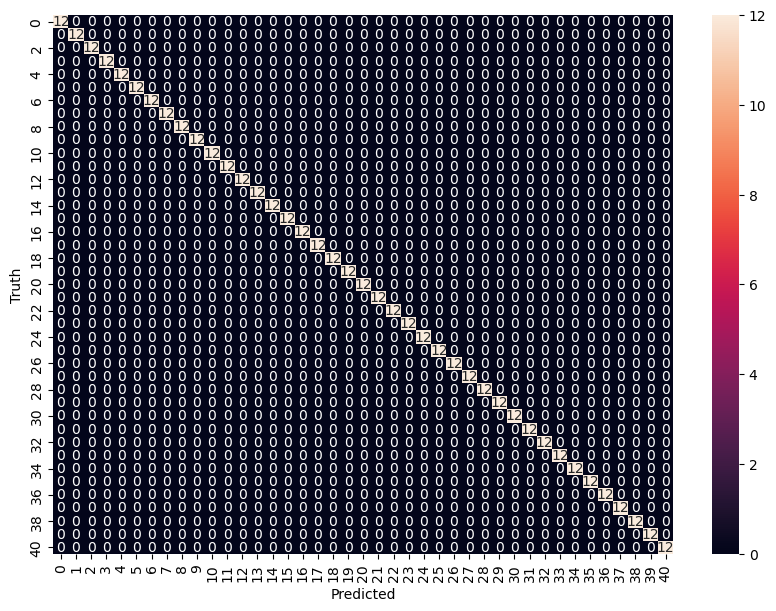

In [127]:
# from sklearn.metrics import confusion_matrix , classification_report
# import seaborn as sn

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

#   import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [128]:
diseases_classes

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [129]:
symptoms

Index(['mild_fever', 'swelling_of_stomach', 'chills', 'patches_in_throat',
       'stomach_pain', 'abdominal_pain', 'receiving_blood_transfusion',
       'blister', 'swelled_lymph_nodes', 'history_of_alcohol_consumption',
       ...
       'anxiety', 'runny_nose', 'brittle_nails', 'spotting_ urination',
       'irritation_in_anus', 'blood_in_sputum', 'mucoid_sputum',
       'abnormal_menstruation', 'yellowish_skin', 'loss_of_appetite'],
      dtype='object', length=131)

## Saving Model

In [130]:
# from tensorflow.keras.models import load_model

# Save the model
model.save("n_diseases_model.h5")

In [131]:
# import json

data = {
        "model_path": "general_conditions_model.h5",
        "diseases_classes": diseases_classes.tolist(),
        "symptoms":symptoms.tolist(),
        }
json.dump(data, open('model_detail.json', 'w') , indent=4)

In [ ]:
data = {
        "model_path": "general_conditions_model.h5",
        "testx": x_test.tolist(),
        "testy":y_test.tolist(),
        }
json.dump(data, open('test/test.json', 'w') , indent=4)

### checking model loading and testing functions

In [10]:
# Load the dictionary from the json file
data = json.load(open("model_detail.json", "r") )

# Load the model
loaded_model = load_model(data["model_path"],compile=False)

# Load the categories
diseases_classes = data["diseases_classes"]
symptoms_classes = data["symptoms"]

In [13]:
# Example usage
print("diseases_classes:", diseases_classes)
print("\nsymptoms_classes:", symptoms_classes)

diseases_classes: ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']

symptoms_classes: ['mild_fever', 'swelling_of_stomach', 'chills', 'patches_in_throat', 'stomach_pain', 'abdominal_pain', 'receiving_blood_transfusion', 'blister', 'swelled_lymph_nodes', 'history_of_alcohol_consumption', 'burning_micturition', 'skin_rash', 'nodal_skin_eruptions', 

In [14]:
data = json.load(open("test/test.json", "r") )
# Load the categories
testx = data["testx"]
testy = data["testy"]

In [15]:
diseases_classes.index("Typhoid")

37

In [16]:
indices = [index for index, value in enumerate(testy) if value == 37]
indices

[38, 129, 136, 171, 189, 196, 203, 209, 214, 380, 407, 443]

In [17]:
[symptoms_classes[i] for i , sym in enumerate(testx[38])if sym==1]

['chills',
 'abdominal_pain',
 'fatigue',
 'vomiting',
 'toxic_look_(typhos)',
 'headache',
 'diarrhoea',
 'belly_pain',
 'nausea',
 'high_fever',
 'constipation']

In [ ]:
# After enduring chills, abdominal pain, and fatigue, I noticed my appearance becoming typhos with a toxic look, followed by bouts of vomiting, headache, and diarrhoea, alongside persistent belly pain, nausea, high fever, and episodes of constipation.